In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import train_test_split
import sklearn.metrics as sk
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.neighbors import  KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data

In [146]:
data=pd.read_csv('Covid Data.csv')

-->sex: female or male
-->age: of the patient.
-->classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
-->degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
-->patient type: hospitalized or not hospitalized.
-->pneumonia: whether the patient already have air sacs inflammation or not.
-->pregnancy: whether the patient is pregnant or not.
-->diabetes: whether the patient has diabetes or not.
-->copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
-->asthma: whether the patient has asthma or not.
-->inmsupr: whether the patient is immunosuppressed or not.
-->hypertension: whether the patient has hypertension or not.
-->cardiovascular: whether the patient has heart or blood vessels related disease.
-->renal chronic: whether the patient has chronic renal disease or not.
-->other disease: whether the patient has other disease or not.
-->obesity: whether the patient is obese or not.
-->tobacco: whether the patient is a tobacco user.
-->usmr: Indicates whether the patient treated medical units of the first, second or third level.
-->medical unit: type of institution of the National Health System that provided the care.
-->intubed: whether the patient was connected to the ventilator.
-->icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
-->death: indicates whether the patient died or recovered.

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [148]:
data.describe()

USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.751073e+01  5.424242e+00  5.132258e+00   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  3.000000e+01  2.000000e+00  2.000000e+00  2.000000e+00   
50%    2.000000e+00  4.000000e+01  9.700000e+01  2.000000e+00  2.000000e+00   
75%    2.000000e+00  5.300000e+01  9.700000e+01  2.000000e+00  2.000000e+00   
max    9.900000e+01  1.210000e+02  9.800000e+01  9.800000e+01  9.800000e+01   

             ASTHMA       INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean   2.242626e+00  2.298132e+00  2.128989e+00   2.435143e+00   
std    5.114089e+00  5.462843e+00  5.236397e+00   6.646676e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
50%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
75%    2.000000e+00  2.000000e+00  2.000000e+00   2.000000e+00   
max    9.800000e+01  9.800000e+01  9.800000e+01   9.800000e+01   

       CARDIOVASCULAR       OBESITY  RENAL_CHRONIC       TOBACCO  \
count    1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06   
mean     2.261810e+00  2.125176e+00   2.257180e+00  2.214333e+00   
std      5.194850e+00  5.175445e+00   5.135354e+00  5.323097e+00   
min      1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
25%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
50%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
75%      2.000000e+00  2.000000e+00   2.000000e+00  2.000000e+00   
max      9.800000e+01  9.800000e+01   9.800000e+01  9.800000e+01   

       CLASIFFICATION_FINAL           ICU  
count          1.048575e+06  1.048575e+06  
mean           5.305653e+00  7.955397e+01  
std            1.881165e+00  3.682307e+01  
min            1.000000e+00  1.000000e+00  
25%            3.000000e+00  9.700000e+01  
50%            6.000000e+00  9.700000e+01  
75%            7.000000e+00  9.700000e+01  
max            7.000000e+00  9.900000e+01

In [149]:
data.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

check null values

In [150]:
data.isnull().value_counts()

USMER  MEDICAL_UNIT  SEX    PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  AGE    PREGNANT  DIABETES  COPD   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
False  False         False  False         False      False    False      False  False     False     False  False   False    False         False          False           False    False          False    False                 False    1048575
dtype: int64

check duplicates

In [151]:
data.duplicated().value_counts()

True     812049
False    236526
dtype: int64

1-2-3 means COVID and 4-5-6-7 means not COVID. So we convert like that

In [152]:
data['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'].replace([1,2,3], 1)
data['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'].replace([4,5,6,7], 2)

preprocessing on pregnant column

In [153]:
data['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

Boolean features, 1 means "yes" and 2 means "no". values as 97 and 98 are missing data

In [154]:
data[data['PREGNANT']==98][data['SEX']==1].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\1726130756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==98][data['SEX']==1].value_counts()


USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED   INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU
2      12            1    1             9999-99-99  97       2          33   98        2         2     2       2        2             2              2               2        2              2        2                     97     30
                                                                        35   98        2         2     2       2        2             2              2               2        2              2        2                     97     24
                                                                        24   98        2         2     2       2        2             2              2               2        2              2        2                     97     24
                                                                        27   98       

In [155]:
data[data['PREGNANT']==98][data['SEX']==2].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\2842051934.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==98][data['SEX']==2].value_counts()


Series([], dtype: int64)

In [156]:
data[data['PREGNANT']==97][data['SEX']==1].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\3185305491.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==97][data['SEX']==1].value_counts()


Series([], dtype: int64)

In [157]:
data[data['PREGNANT']==97][data['SEX']==2].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\2931213548.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==97][data['SEX']==2].value_counts()


USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED   INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU
2      12            2    1             9999-99-99  97       2          30   97        2         2     2       2        2             2              2               2        2              2        2                     97     2440
                                                                        31   97        2         2     2       2        2             2              2               2        2              2        2                     97     2409
                                                                        28   97        2         2     2       2        2             2              2               2        2              2        2                     97     2362
                                                                        27   97 

check which value is male and female

In [158]:
data[data['PREGNANT']==1][data['SEX']==2].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\185690816.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==1][data['SEX']==2].value_counts()


Series([], dtype: int64)

In [159]:
data[data['PREGNANT']==1][data['SEX']==1].value_counts()

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\3252179932.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['PREGNANT']==1][data['SEX']==1].value_counts()


USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED   INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU
2      12            1    1             9999-99-99  97       2          21   1         2         2     2       2        2             2              2               2        2              2        2                     97     81
                                                                        28   1         2         2     2       2        2             2              2               2        2              2        2                     97     77
                                                                        27   1         2         2     2       2        2             2              2               2        2              2        2                     97     74
                                                                        25   1        

So, 1 is female and 2 is male --> male cant be pregnant

from the above checks we can conclude that values as 97 null for males and 99 null for females

males cant be pregnant, so we convert 97 to 2 and drop 98 it's a missed data in pregnant column for females

In [160]:
data['PREGNANT'] = data['PREGNANT'].replace(97, 2)

In [161]:
data.drop(data[data['PREGNANT']==98].index,inplace=True)

In [162]:
data['PREGNANT'].value_counts()

2    1036690
1       8131
Name: PREGNANT, dtype: int64

check for missing data

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044821 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1044821 non-null  int64 
 1   MEDICAL_UNIT          1044821 non-null  int64 
 2   SEX                   1044821 non-null  int64 
 3   PATIENT_TYPE          1044821 non-null  int64 
 4   DATE_DIED             1044821 non-null  object
 5   INTUBED               1044821 non-null  int64 
 6   PNEUMONIA             1044821 non-null  int64 
 7   AGE                   1044821 non-null  int64 
 8   PREGNANT              1044821 non-null  int64 
 9   DIABETES              1044821 non-null  int64 
 10  COPD                  1044821 non-null  int64 
 11  ASTHMA                1044821 non-null  int64 
 12  INMSUPR               1044821 non-null  int64 
 13  HIPERTENSION          1044821 non-null  int64 
 14  OTHER_DISEASE         1044821 non-null  int64 
 15

convert values 97 98 99 to none because it is a missing data

In [164]:
data1=data.drop(columns=['AGE','DATE_DIED','MEDICAL_UNIT','CLASIFFICATION_FINAL']).columns
for feature in data1:
    data[feature][(data[feature]>=97)&(data[feature]<=99)]=None

C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\4206046249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][(data[feature]>=97)&(data[feature]<=99)]=None
C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\4206046249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][(data[feature]>=97)&(data[feature]<=99)]=None
C:\Users\hesha\AppData\Local\Temp\ipykernel_8928\4206046249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

view nulls

In [165]:
data.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 852444
PNEUMONIA                15638
AGE                          0
PREGNANT                     0
DIABETES                  3157
COPD                      2816
ASTHMA                    2793
INMSUPR                   3207
HIPERTENSION              2923
OTHER_DISEASE             4843
CARDIOVASCULAR            2891
OBESITY                   2854
RENAL_CHRONIC             2825
TOBACCO                   3041
CLASIFFICATION_FINAL         0
ICU                     852605
dtype: int64

drop columns with large count of nulls

In [166]:
data.drop(['INTUBED','ICU'],inplace=True,axis=1)

In [167]:
data.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
PNEUMONIA               15638
AGE                         0
PREGNANT                    0
DIABETES                 3157
COPD                     2816
ASTHMA                   2793
INMSUPR                  3207
HIPERTENSION             2923
OTHER_DISEASE            4843
CARDIOVASCULAR           2891
OBESITY                  2854
RENAL_CHRONIC            2825
TOBACCO                  3041
CLASIFFICATION_FINAL        0
dtype: int64

drop the rest of nulls

In [168]:
data.dropna(inplace=True)

Add column to know whether is died or not --> from date died column if value is 9999-99-99, so it is null value

In [169]:
data['IS-DIED']=data['DATE_DIED'].apply(lambda x: 2 if str(x)=='9999-99-99' else 1)

In [170]:
data.drop('DATE_DIED',inplace=True,axis=1)

check duplicates

In [171]:
data.duplicated().sum()

868146

In [172]:
data.drop_duplicates(inplace=True)

Reset index

In [173]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153831 entries, 0 to 153830
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 153831 non-null  int64  
 1   MEDICAL_UNIT          153831 non-null  int64  
 2   SEX                   153831 non-null  int64  
 3   PATIENT_TYPE          153831 non-null  int64  
 4   PNEUMONIA             153831 non-null  float64
 5   AGE                   153831 non-null  int64  
 6   PREGNANT              153831 non-null  int64  
 7   DIABETES              153831 non-null  float64
 8   COPD                  153831 non-null  float64
 9   ASTHMA                153831 non-null  float64
 10  INMSUPR               153831 non-null  float64
 11  HIPERTENSION          153831 non-null  float64
 12  OTHER_DISEASE         153831 non-null  float64
 13  CARDIOVASCULAR        153831 non-null  float64
 14  OBESITY               153831 non-null  float64
 15  

In [175]:
data.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA  AGE  PREGNANT  DIABETES  \
0      2             1    1             1        1.0   65         2       2.0   
1      2             1    2             1        1.0   72         2       2.0   
2      2             1    2             2        2.0   55         2       1.0   
3      2             1    1             1        2.0   53         2       2.0   
4      2             1    2             1        2.0   68         2       1.0   

   COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
0   2.0     2.0      2.0           1.0            2.0             2.0   
1   2.0     2.0      2.0           1.0            2.0             2.0   
2   2.0     2.0      2.0           2.0            2.0             2.0   
3   2.0     2.0      2.0           2.0            2.0             2.0   
4   2.0     2.0      2.0           1.0            2.0             2.0   

   OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  IS-DIED  
0      2.0            2.0      2.0                     1        1  
1      1.0            1.0      2.0                     2        1  
2      2.0            2.0      2.0                     1        1  
3      2.0            2.0      2.0                     2        1  
4      2.0            2.0      2.0                     1        1

Data Analysis

The next graph illustrate the range of age that died of covid -> the most of the people above 20 till 80's is the most died cases

<AxesSubplot:xlabel='AGE', ylabel='Count'>

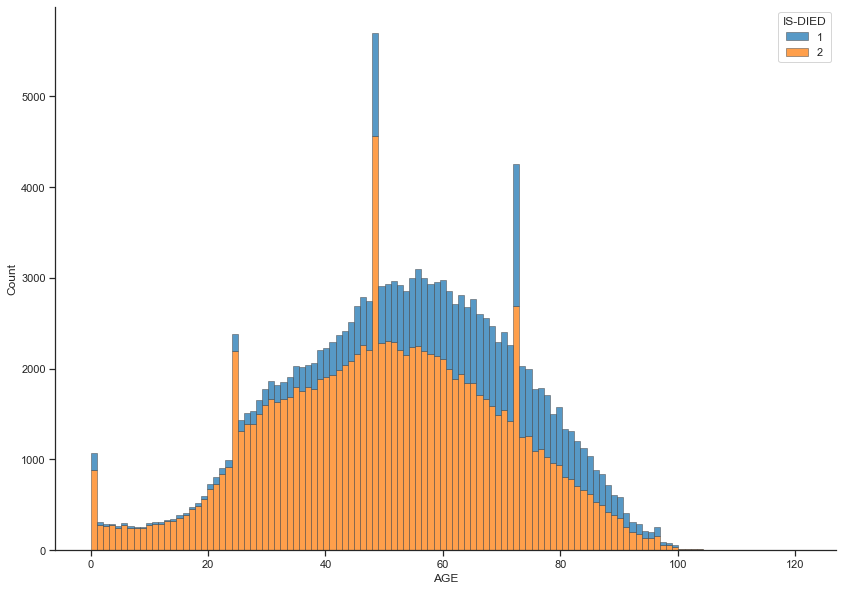

In [176]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(14, 10))
sns.despine(f)
sns.color_palette("tab10")
sns.histplot(
    data, x="AGE", hue="IS-DIED",
    multiple="stack",edgecolor=".3",palette='tab10',
    linewidth=.5,
)

next graph is a relation between smokers and their count hued by is died or not --> the number of smokers died of covid more than the non-smokers

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

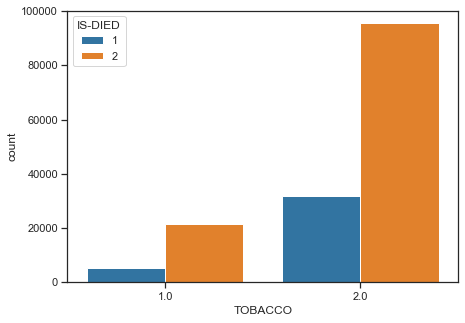

In [177]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.TOBACCO, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between Diabetes and their count hued by is died or not --> the number of people have diabetes and  died of covid are more

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

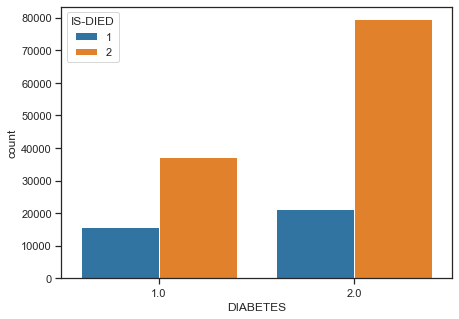

In [178]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.DIABETES, hue = data['IS-DIED'],palette='tab10')

heat map shows correlation between features

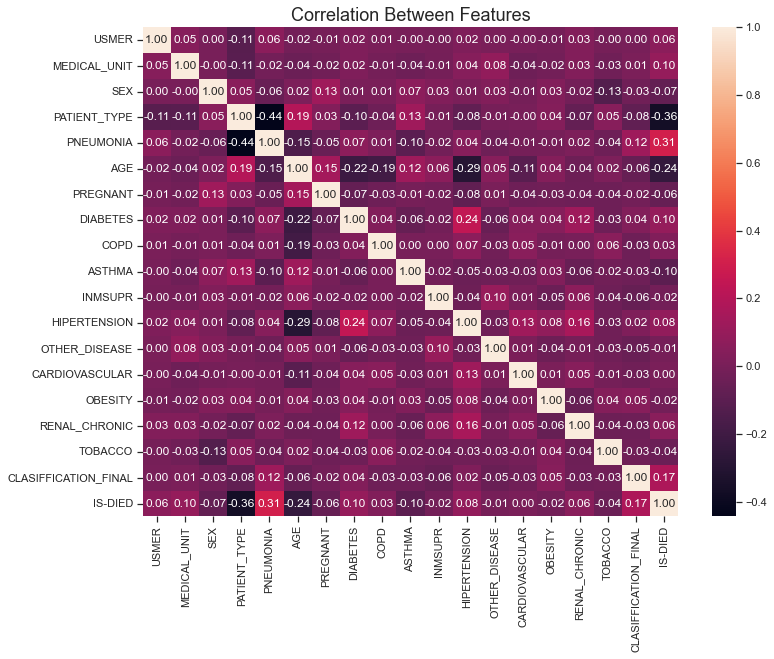

In [179]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18);

next graph is a relation between sex and their count hued by is died or not --> the number of males died of covid less than the females

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

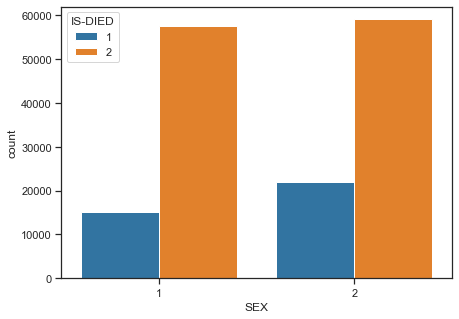

In [180]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.SEX, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between immunosuppressed or not and their count hued by is died or not --> the number of immunosuppressed died of covid more than the not immunosuppressed

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

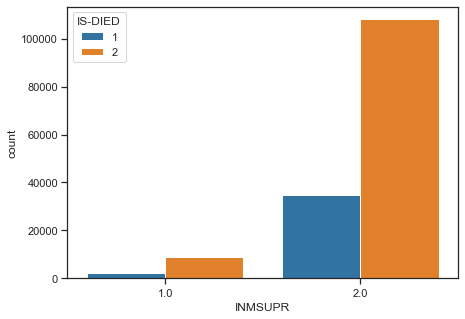

In [181]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.INMSUPR, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between obesities and their count hued by is died or not --> the number of obesities died of covid more than the non-obesities

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

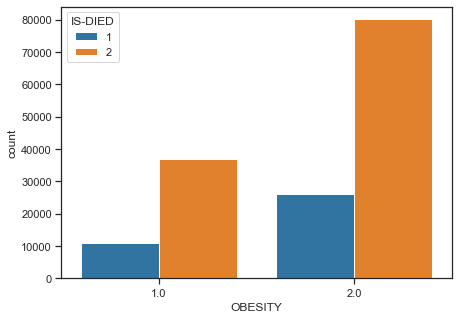

In [182]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.OBESITY, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between  people have heart or blood vessels related disease and their count hued by is died or not --> the number of CARDIOVASCULARes died of covid more than the non-CARDIOVASCULARes

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

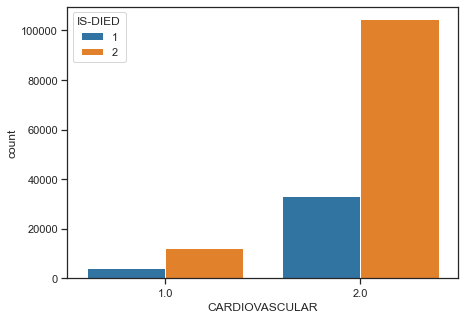

In [183]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.CARDIOVASCULAR, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between patient has chronic renal disease or not and their count hued by is died or not --> the number of RENAL_CHRONIC died of covid more than the non-RENAL_CHRONIC

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

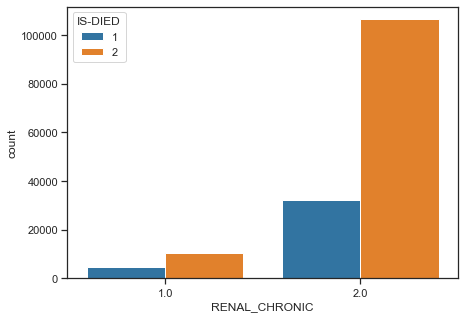

In [184]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.RENAL_CHRONIC, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between have covid and their count hued by is died or not

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

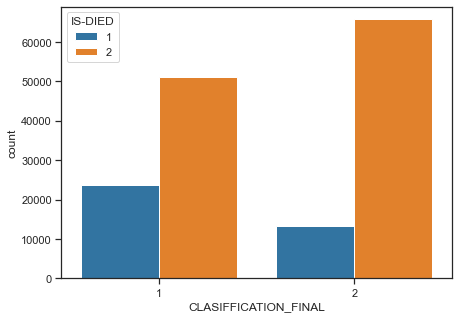

In [185]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.CLASIFFICATION_FINAL, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between HIPERTENSION and their count hued by is died or not --> the number of patient has hypertension died of covid more than not

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

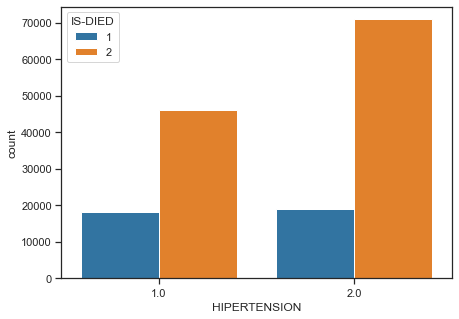

In [186]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.HIPERTENSION, hue = data['IS-DIED'],palette='tab10')

next graph is a relation between patient has Chronic obstructive pulmonary disease or not and their count hued by is died or not --> the number of COPDs died of covid more than the non-smokers

C:\Users\hesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

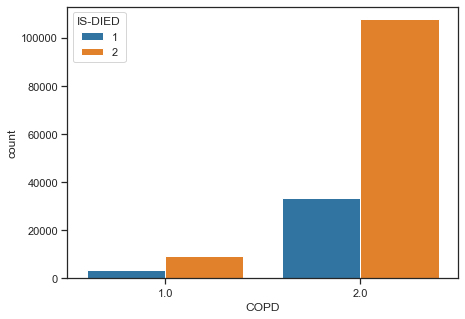

In [187]:
plt.figure()
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(data.COPD, hue = data['IS-DIED'],palette='tab10')

data standardization

In [188]:
scaler = StandardScaler()
model=scaler.fit(data[["AGE","MEDICAL_UNIT"]])
data[["AGE","MEDICAL_UNIT"]]=model.transform(data[["AGE","MEDICAL_UNIT"]])

In [189]:
data.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA       AGE  PREGNANT  \
0      2     -1.809032    1             1        1.0  0.618965         2   
1      2     -1.809032    2             1        1.0  0.976074         2   
2      2     -1.809032    2             2        2.0  0.108809         2   
3      2     -1.809032    1             1        2.0  0.006777         2   
4      2     -1.809032    2             1        2.0  0.772012         2   

   DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0       2.0   2.0     2.0      2.0           1.0            2.0   
1       2.0   2.0     2.0      2.0           1.0            2.0   
2       1.0   2.0     2.0      2.0           2.0            2.0   
3       2.0   2.0     2.0      2.0           2.0            2.0   
4       1.0   2.0     2.0      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  \
0             2.0      2.0            2.0      2.0                     1   
1             2.0      1.0            1.0      2.0                     2   
2             2.0      2.0            2.0      2.0                     1   
3             2.0      2.0            2.0      2.0                     2   
4             2.0      2.0            2.0      2.0                     1   

   IS-DIED  
0        1  
1        1  
2        1  
3        1  
4        1

Machine Learning Models

Split data

In [190]:
x=data.drop('IS-DIED',axis=1)
y=data['IS-DIED']

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=43,shuffle=True)

CATBOOST Classifier

In [192]:
from catboost import CatBoostClassifier

model=CatBoostClassifier(eval_metric='Accuracy')
cat=model.fit(x_train,y_train,eval_set=(x_test,y_test),verbose=200)

Learning rate set to 0.104033
0:	learn: 0.7836898	test: 0.7787890	best: 0.7787890 (0)	total: 25.4ms	remaining: 25.4s
200:	learn: 0.7908405	test: 0.7851269	best: 0.7861020 (154)	total: 3.24s	remaining: 12.9s
400:	learn: 0.7936115	test: 0.7837293	best: 0.7861020 (154)	total: 6.93s	remaining: 10.3s
600:	learn: 0.7964880	test: 0.7824292	best: 0.7861020 (154)	total: 10.4s	remaining: 6.9s
800:	learn: 0.7980482	test: 0.7822667	best: 0.7861020 (154)	total: 12.4s	remaining: 3.07s
999:	learn: 0.7997627	test: 0.7816492	best: 0.7861020 (154)	total: 14.4s	remaining: 0us

bestTest = 0.7861019924
bestIteration = 154

Shrink model to first 155 iterations.


Logistic Regression

In [193]:
logistic=LogisticRegression(class_weight='dict',multi_class='ovr',penalty='l2',solver='lbfgs',random_state=42,max_iter=500)

In [194]:
logistic.fit(x_train,y_train)

LogisticRegression(class_weight='dict', max_iter=500, multi_class='ovr',
                   random_state=42)

In [195]:
logistic_pred=logistic.predict(x_test)

In [196]:
logistic_score=sk.f1_score(y_test,logistic_pred)

In [197]:
logistic_score

0.4356647970966677

In [198]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           1       0.58      0.35      0.44      7543
           2       0.81      0.92      0.86     23224

    accuracy                           0.78     30767
   macro avg       0.69      0.63      0.65     30767
weighted avg       0.75      0.78      0.76     30767



Learning curve

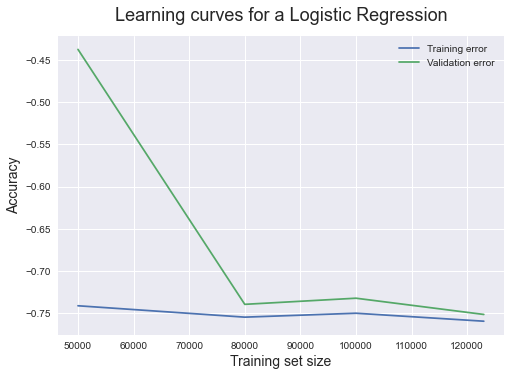

In [199]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=logistic, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Logistic Regression', fontsize=18, y=1.03)
plt.legend()

Grid Search for logistic regression

In [ ]:
param_grid = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga', 'sag'],
    'class_weight': ['dict', 'balanced', 'none'],
    'multi_class': ['ovr', 'multinomial', 'auto'],

}]
log = GridSearchCV(logistic, param_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

In [200]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7776188773686092

Random Forest Classifier

In [261]:
ran = RandomForestClassifier(criterion='log_loss',max_features=None,random_state=43)
ran.fit(x_train, y_train)
ran_pred = ran.predict(x_test)
ran_score=sk.f1_score(y_test,ran_pred)
ran_score

0.30521861777150916

In [262]:
print(classification_report(y_test,ran_pred))

              precision    recall  f1-score   support

           1       0.33      0.29      0.31      7543
           2       0.78      0.81      0.79     23224

    accuracy                           0.68     30767
   macro avg       0.55      0.55      0.55     30767
weighted avg       0.67      0.68      0.67     30767



Learning Curve

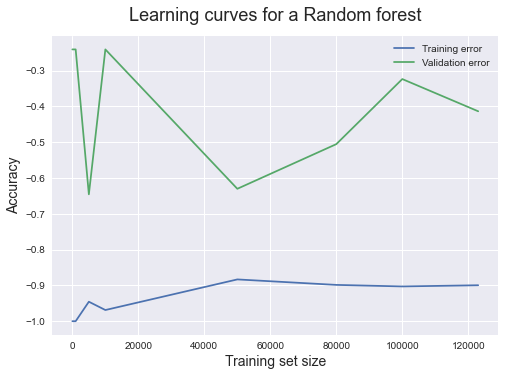

In [263]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=ran, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Random forest', fontsize=18, y=1.03)
plt.legend()

Grid search

In [ ]:
param_grid = [{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}]
log = GridSearchCV(ran, param_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

Ada Boost Classifier

In [201]:
ABC = AdaBoostClassifier(algorithm='SAMME')
ABC.fit(x_train, y_train)
ABC_Pred = ABC.predict(x_test)
sk.f1_score(y_test, ABC_Pred)

0.47069710055521286

In [202]:
print(classification_report(y_test,ABC_Pred))

              precision    recall  f1-score   support

           1       0.56      0.40      0.47      7543
           2       0.82      0.90      0.86     23224

    accuracy                           0.78     30767
   macro avg       0.69      0.65      0.66     30767
weighted avg       0.76      0.78      0.76     30767



Learning Curve

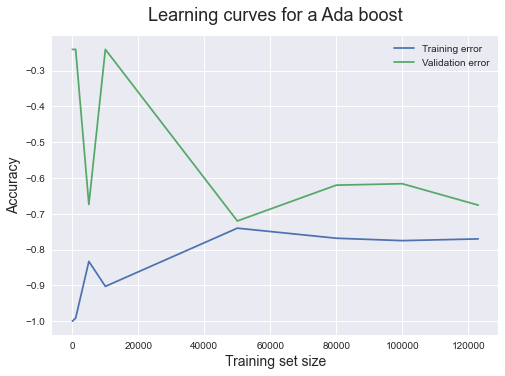

In [266]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=ABC, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Ada boost', fontsize=18, y=1.03)
plt.legend()

Grid search

In [46]:
param_grid = [{
   'learning_rate':[1.0,2.0,3.0],
    'algorithm':['SAMME', 'SAMME.R'],


}]
log = GridSearchCV(ABC, param_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 9, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 9, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = n

{'algorithm': 'SAMME', 'learning_rate': 1.0}

KNeighbors Classifier

In [203]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_score = sk.f1_score(y_test, knn_pred)
knn_score

0.4545945216569964

In [204]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.46      0.45      0.45      7543
           2       0.82      0.83      0.83     23224

    accuracy                           0.74     30767
   macro avg       0.64      0.64      0.64     30767
weighted avg       0.73      0.74      0.74     30767



Learning Curve

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=

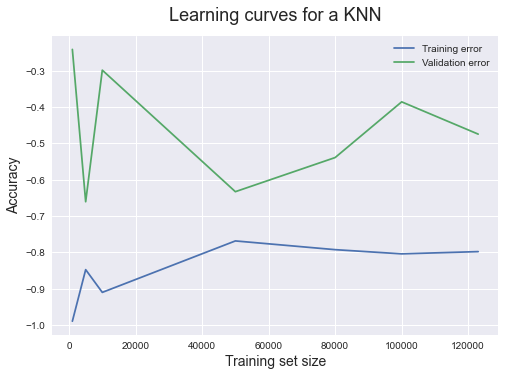

In [68]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=knn, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a KNN', fontsize=18, y=1.03)
plt.legend()

In [205]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x_train, y_train)
knn2_pred = knn2.predict(x_test)
knn2_score = sk.f1_score(y_test, knn2_pred)
print(classification_report(y_test, knn2_pred))

              precision    recall  f1-score   support

           1       0.29      0.30      0.29      7543
           2       0.77      0.76      0.77     23224

    accuracy                           0.65     30767
   macro avg       0.53      0.53      0.53     30767
weighted avg       0.65      0.65      0.65     30767



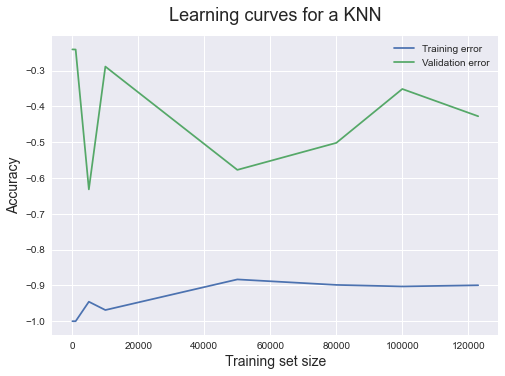

In [268]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=knn2, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a KNN', fontsize=18, y=1.03)
plt.legend()

Grid search

In [50]:
param_grid = [{
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}]
log = GridSearchCV(knn, param_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

{'algorithm': 'auto', 'p': 2, 'weights': 'uniform'}

Apply PCA

In [134]:
scalar = StandardScaler()
scalar.fit(x)
scaled_data = scalar.transform(x)
pca = PCA(n_components = 0.99)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(153831, 18)

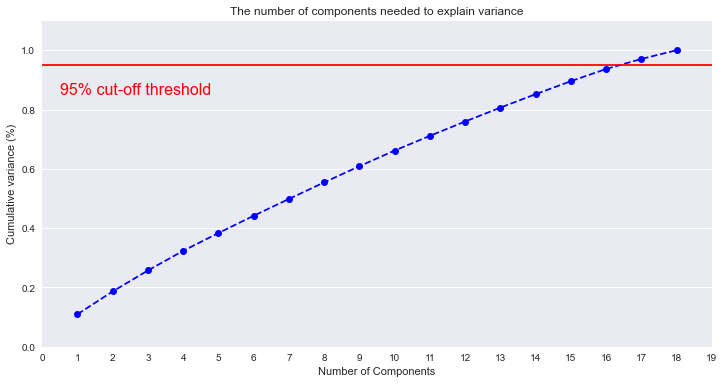

In [136]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

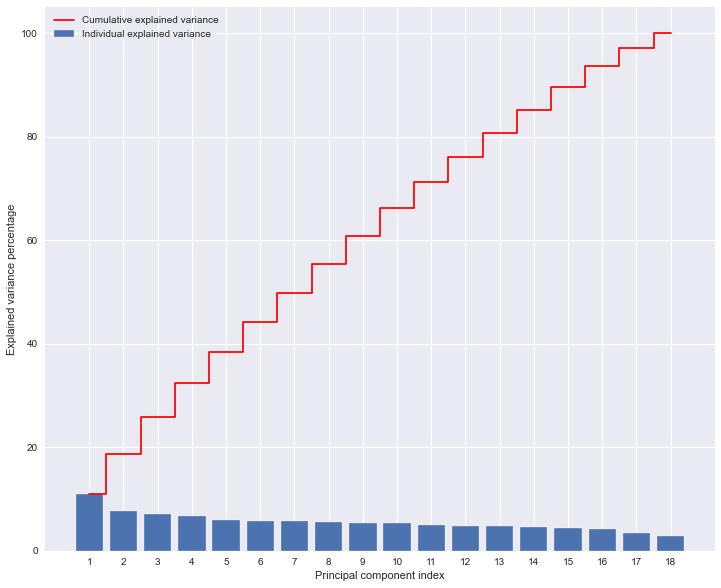

In [160]:
pca = PCA(n_components=None)
pca.fit(scaled_data)
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
plt.rcParams["figure.figsize"] = (12,10)
plt.bar(range(1, 19), exp_var, align='center',
        label='Individual explained variance')
plt.step(range(1, 19), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(np.arange(1, 19, step=1))
plt.legend(loc='best')


In [226]:
scalar = StandardScaler()
scalar.fit(x)
scaled_data = scalar.transform(x)
pca = PCA(n_components=0.99,svd_solver='full')
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(153831, 18)

Text(0, 0.5, 'Second Principal Component')

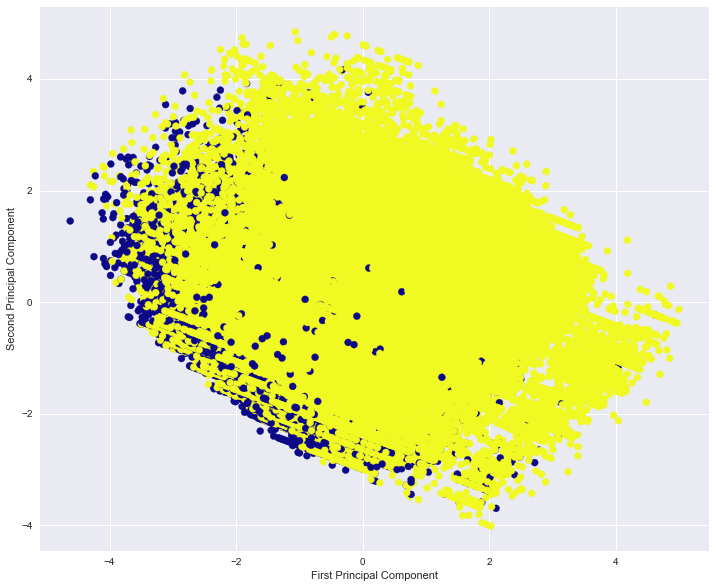

In [227]:

# giving a larger plot
plt.figure(figsize =(12, 10))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = data['IS-DIED'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

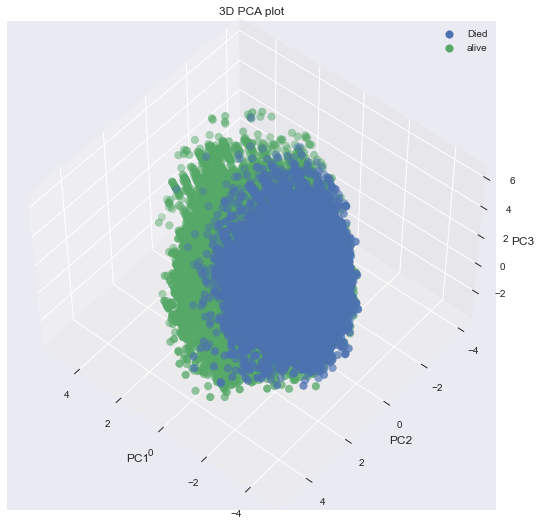

In [245]:
Xax = x_pca[:,0]
Yax = x_pca[:,1]
Zax = x_pca[:,2]
cdict = {0:1,1:2}
label = {1:'Died',2:'alive'}
y = y
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111,
                     projection='3d')

for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix],
               Yax[ix],
               Zax[ix],

               s=60,
               label=label[l])

ax.set_xlabel("PC1",
              fontsize=12)
ax.set_ylabel("PC2",
              fontsize=12)
ax.set_zlabel("PC3",
              fontsize=12)

ax.view_init(50, 130)
ax.legend()
plt.title("3D PCA plot")
plt.show()

<AxesSubplot:>

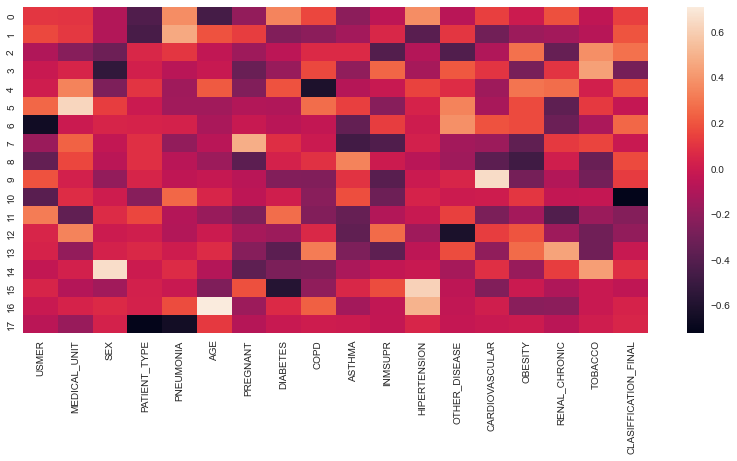

In [228]:
df_comp = pd.DataFrame(pca.components_, columns = x.columns)
plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)

Split data after pca

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,train_size=0.8,random_state=43)

GaussianNB with PCA

In [230]:
NB=GaussianNB()

In [231]:
NB.fit(x_train,y_train)

GaussianNB()

In [232]:
NB_Pred=NB.predict(x_test)

In [233]:
NB_Score=sk.f1_score(y_test,NB_Pred)

In [234]:
NB_Score

0.4708624708624709

In [235]:
print(classification_report(y_test, NB_Pred))

              precision    recall  f1-score   support

           1       0.52      0.43      0.47      7543
           2       0.82      0.87      0.85     23224

    accuracy                           0.76     30767
   macro avg       0.67      0.65      0.66     30767
weighted avg       0.75      0.76      0.76     30767



Learning curve

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:487: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:488: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:488: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:487: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\naive_bayes.py:488: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hesha\

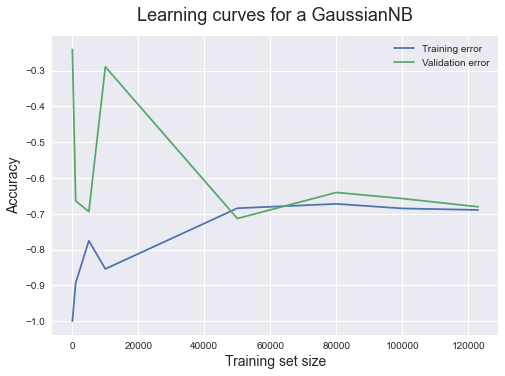

In [236]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=NB, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a GaussianNB', fontsize=18, y=1.03)
plt.legend()

KNN After PCA

In [271]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x_train, y_train)
knn2_pred = knn2.predict(x_test)
knn2_score = sk.f1_score(y_test, knn2_pred)
print(classification_report(y_test, knn2_pred))


              precision    recall  f1-score   support

           1       0.29      0.30      0.30      7543
           2       0.77      0.76      0.77     23224

    accuracy                           0.65     30767
   macro avg       0.53      0.53      0.53     30767
weighted avg       0.65      0.65      0.65     30767



Learning Curve

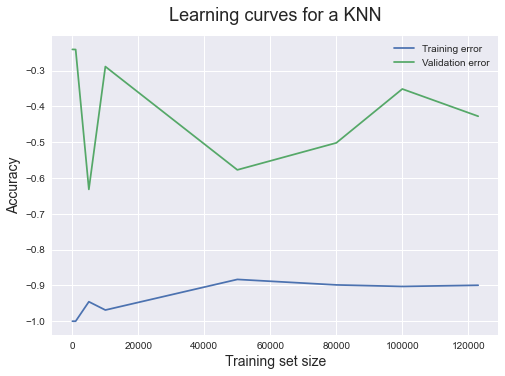

In [272]:
train_sizes = [1, 1000, 5000, 10000, 50000, 80000, 100000, 123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=knn2, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a KNN', fontsize=18, y=1.03)
plt.legend()

Data Clustering

In [61]:
wcss=[]
k = range(1,20)
for i in k:
    kmeans=KMeans(n_clusters=i,random_state=43)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

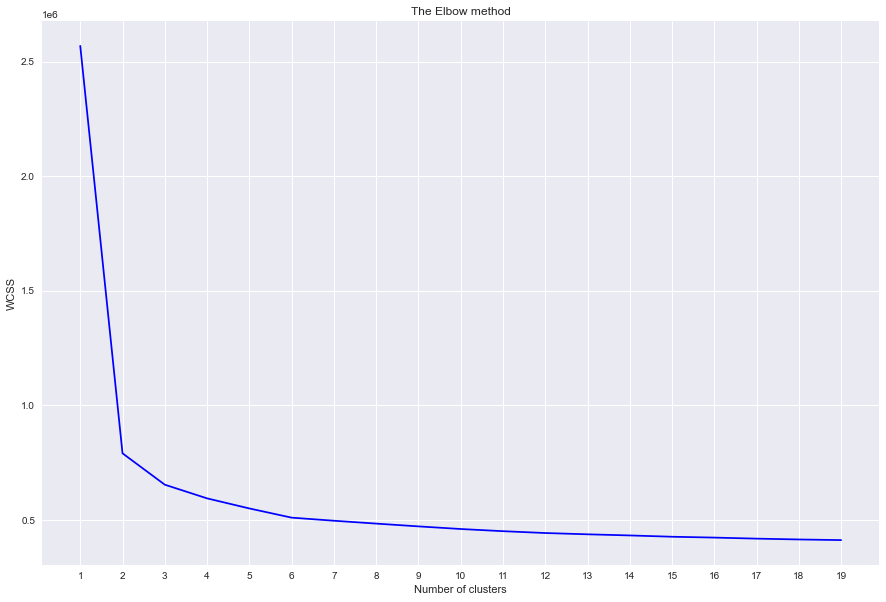

In [80]:
plt.figure(figsize=(15, 10))
plt.xticks([i for i in range(1, 20)])
plt.plot(k, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow method')
plt.show()

elbow found on n = 6

In [63]:
kmeans = KMeans(n_clusters=6, random_state=0)
y_kmeans = kmeans.fit_predict(data)
silhouette_score(X=data, labels=y_kmeans, metric='euclidean')

0.171794211153215

Join clusters column with data

In [67]:
data_Clustered=data.join(pd.DataFrame(y_kmeans.reshape(-1,1)))

In [68]:
data_Clustered.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA       AGE  PREGNANT  \
0      2             1    1             1        1.0  0.618965         2   
1      2             1    2             1        1.0  0.976074         2   
2      2             1    2             2        2.0  0.108809         2   
3      2             1    1             1        2.0  0.006777         2   
4      2             1    2             1        2.0  0.772012         2   

   DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0       2.0   2.0     2.0      2.0           1.0            2.0   
1       2.0   2.0     2.0      2.0           1.0            2.0   
2       1.0   2.0     2.0      2.0           2.0            2.0   
3       2.0   2.0     2.0      2.0           2.0            2.0   
4       1.0   2.0     2.0      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  \
0             2.0      2.0            2.0      2.0                     1   
1             2.0      1.0            1.0      2.0                     2   
2             2.0      2.0            2.0      2.0                     1   
3             2.0      2.0            2.0      2.0                     2   
4             2.0      2.0            2.0      2.0                     1   

   IS-DIED  0  
0        1  3  
1        1  3  
2        1  3  
3        1  1  
4        1  3

convert column name to str type and column values to int

In [74]:
data_Clustered["clusters"]=data_Clustered[0].apply(lambda x: int(x))
data_Clustered.drop(0,inplace=True,axis=1)

Split data after clustering

In [75]:
x = data_Clustered.drop('IS-DIED', axis=1)
y = data_Clustered['IS-DIED']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=43)


Logistic regression after clustering

In [87]:
logistic = LogisticRegression(class_weight='dict', multi_class='ovr', penalty='l2', solver='newton-cg', random_state=42,
                              max_iter=500)
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_test)
logistic_score = sk.f1_score(y_test, logistic_pred)
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           1       0.58      0.36      0.44      7543
           2       0.81      0.91      0.86     23224

    accuracy                           0.78     30767
   macro avg       0.70      0.64      0.65     30767
weighted avg       0.76      0.78      0.76     30767



Learning curve

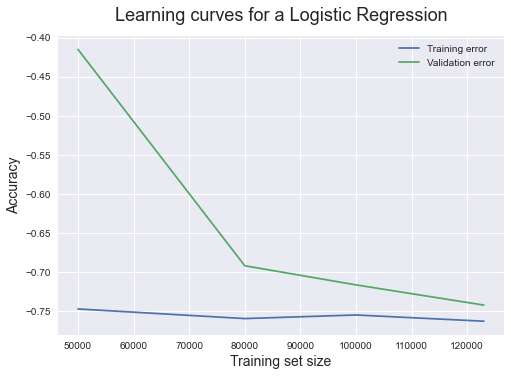

In [88]:
train_sizes = [1, 1000, 5000, 10000, 50000,80000,100000,123000]
train_sizes, train_scores, validation_scores = learning_curve(estimator=logistic, X=x, y=y,
                                                              train_sizes=train_sizes, cv=8,
                                                              scoring='accuracy')
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Logistic Regression', fontsize=18, y=1.03)
plt.legend()

Grid search

In [86]:
param_grid = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga', 'sag'],
    'class_weight': ['dict', 'balanced', 'none'],
    'multi_class': ['ovr', 'multinomial', 'auto'],

}]
log = GridSearchCV(logistic, param_grid, cv=3)
log.fit(x_train, y_train)
log.best_params_

C:\Users\hesha\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
339 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hesha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
   

{'class_weight': 'dict',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'newton-cg'}